In [188]:
import pandas as pd
import numpy as np
import random
import string
import math
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import imblearn
%matplotlib inline

In [2]:
df = pd.read_csv("dataset_31_credit-g.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [185]:
df.shape

(1000, 21)

In [190]:
cust_ids  = []
for i in range(df.shape[0]):
    cust_id = ''.join(random.choices(string.ascii_uppercase +
                             string.digits, k = 5)) 
    cust_ids.append(cust_id)

In [192]:
cust_ids[:10]

['253R2',
 'DMB8B',
 '9Y1SN',
 '5G414',
 'E2H4O',
 'HAR8I',
 'HARFM',
 'VNLPF',
 'SGDY9',
 'FEW5C']

In [193]:
df['cust_id'] = cust_ids

In [196]:
df[['cust_id','credit_amount']].head(10)

,cust_id,credit_amount
0,253R2,1169
1,DMB8B,5951
2,9Y1SN,2096
3,5G414,7882
4,E2H4O,4870
5,HAR8I,9055
6,HARFM,2835
7,VNLPF,6948
8,SGDY9,3059
9,FEW5C,5234


In [9]:
df[['credit_amount']].describe()

,credit_amount
count,1000.000000
mean,3271.258000
std,2822.736876
min,250.000000
25%,1365.500000
50%,2319.500000
75%,3972.250000
max,18424.000000


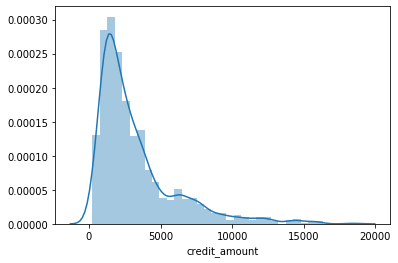

In [11]:
sns.distplot(df.credit_amount)

In [13]:
#Scoring Mechanism

In [58]:
def sigmoid(x,b,c):
    return 1 / (1 + math.exp(-c * (x-b)))

In [59]:
# Mean Squared error between ideal and observed behavior
# b denotes X₀ and c denotes k
def cal_error(c,pcts,values_expected):
    error = math.pow(sigmoid(pcts[0],pcts[3],c) - values_expected[0],2) + math.pow(sigmoid(pcts[1],pcts[3],c) - values_expected[1],2) + math.pow(sigmoid(pcts[2],pcts[3],c) - values_expected[2],2) + math.pow(sigmoid(pcts[3],pcts[3],c) - values_expected[3],2)
    return error


In [121]:
def find_best_decay_parameter(pcts,values_expected):
    best_error = 999999
    best_c = 1.0
    iterations = 5000
    for i in range(iterations):
        tmp = random.random()
        error = cal_error(tmp,pcts,values_expected)
        if error<best_error:
            best_error = error
            best_c = tmp
    return best_c

In [122]:
def find_decay_parameter(data,values_expected):
    data_percentiles = []
    for pct in percentiles:
        data_percentiles.append(round(np.percentile(data,pct),2))
    print(data_percentiles)
    var_b = data_percentiles[3]
    var_c = round(find_best_decay_parameter(data_percentiles,values_expected),5)
    print("Best value of c {}".format(var_c))
    print(round(sigmoid(data_percentiles[0],var_b,var_c),2),round(sigmoid(data_percentiles[1],var_b,var_c),2),
          round(sigmoid(data_percentiles[2],var_b,var_c),2),round(sigmoid(data_percentiles[3],var_b,var_c),2))
    return var_b,var_c

In [139]:
percentiles =     [85,80,75,65]
values_expected = [0.75,0.70,0.65,0.50]
b,c = find_decay_parameter(df.credit_amount,values_expected)

[5969.95, 4720.0, 3972.25, 3187.4]
Best value of c 0.00047
0.79 0.67 0.59 0.5


In [183]:
credit_amounts = [100,500,1200,3000,4000,5200,6000,7500,10000,12000,20000,25000]
risk = []
mp_values = {}
for credit_amount in credit_amounts:
    mp_values[credit_amount] = round(sigmoid(credit_amount,b,c),2)

print(mp_values)

{100: 0.19, 500: 0.22, 1200: 0.28, 3000: 0.48, 4000: 0.59, 5200: 0.72, 6000: 0.79, 7500: 0.88, 10000: 0.96, 12000: 0.98, 20000: 1.0, 25000: 1.0}


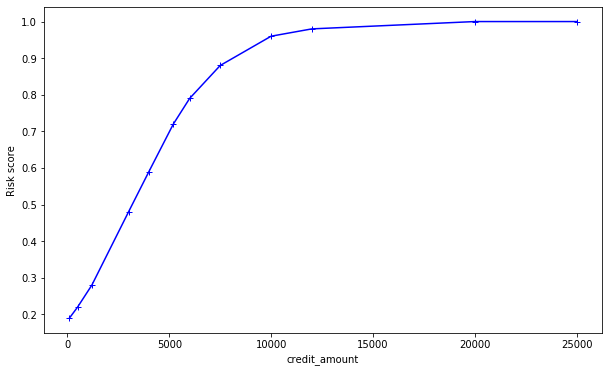

In [198]:
plt.figure(figsize=(10,6))
plt.plot(list(mp_values.keys()),list(mp_values.values()),'b-+')
plt.xlabel("credit_amount")
plt.ylabel("Risk score")
plt.show()